In [ ]:
import json
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from fairlearn.datasets import fetch_adult
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from fairlearn.metrics import demographic_parity_ratio, equalized_odds_ratio
from fairlearn.reductions import DemographicParity

In [4]:
# import pandas as pd
# from fairlearn.metrics import MetricFrame, demographic_parity_difference, equal_opportunity_difference
# from sklearn.metrics import accuracy_score

# def evaluate_classification_fairness(y_true, y_pred, sensitive_features, feature_name):
#     if isinstance(y_true, np.ndarray):
#         y_true = pd.Series(y_true, name="y_true")
#     if isinstance(y_pred, np.ndarray):
#         y_pred = pd.Series(y_pred, name="y_pred")
#     if isinstance(sensitive_features, np.ndarray):
#         sensitive_features = pd.Series(sensitive_features, name=feature_name)

#     common_index = y_true.index.intersection(y_pred.index).intersection(sensitive_features.index)
#     y_true = y_true.loc[common_index]
#     y_pred = y_pred.loc[common_index]
#     sensitive_features = sensitive_features.loc[common_index]

#     metric_frame = MetricFrame(
#         metrics={
#             'Accuracy': accuracy_score,
#             'Demographic Parity': lambda y, p: demographic_parity_difference(y, p, sensitive_features=sensitive_features),
#             'Equal Opportunity': lambda y, p: equal_opportunity_difference(y, p, sensitive_features=sensitive_features),
#         },
#         y_true=y_true,
#         y_pred=y_pred,
#         sensitive_features=sensitive_features
#     )

#     print(f"Classification fairness metrics by {feature_name}:")
#     print(metric_frame.by_group)
#     print("\nOverall metrics:")
#     print(metric_frame.overall)



In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pd.set_option("display.max_columns", None)

df = pd.read_csv('adult/adult.csv')

categorical_columns = ['workclass', 'gender', 'race', 'education', 'marital-status', 'occupation', 'relationship', 'native-country']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

X = df_encoded.drop('income', axis=1)
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_pred = pd.Series(y_pred, index=y_test.index, name="y_pred")


In [12]:
df_encoded.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_?', 'workclass_Federal-gov',
       'workclass_Local-gov',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=109)

In [13]:
df_encoded.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,gender_Female,gender_Male,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,<=50K,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,>50K,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,F

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df = pd.read_csv('adult.csv')
target_labels =  df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Target: 1 if income >50K, else 
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df = pd.read_csv('adult.csv')
df['income'] =  df['income'].apply(lambda x: 1 if x == '>50K' else 0)  # Target: 1 if income >50K, else 

df = df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country'], axis=1)

sensitive_features = df[['race','gender']]
encoded_df = pd.get_dummies(df, columns=['race', 'gender'])

(X_train, X_test, y_train, y_test, A_train, A_test) = train_test_split(
    encoded_df, target_labels, sensitive_features, test_size=0.3, random_state=12345, stratify=target_labels
)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
A_train = A_train.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)

Processing for adult set!
Link at; https://iamrajatroy.medium.com/evaluate-model-fairness-with-fairlearn-97a8985074fd

In [ ]:
numeric_transformer = Pipeline(
    steps=[
        ("impute", SimpleImputer()),
        ("scaler", StandardScaler()),
    ]
)
categorical_transformer = Pipeline(
    [
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("ohe", OneHotEncoder(handle_unknown="ignore")),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, selector(dtype_exclude="category")),
        ("cat", categorical_transformer, selector(dtype_include="category")),
    ]
)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        (
            "classifier",
            LogisticRegression(solver="liblinear", fit_intercept=True),
        ),
    ]
)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013005116050>),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000013004B1FBD0>)])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipeline.predict(X_test)


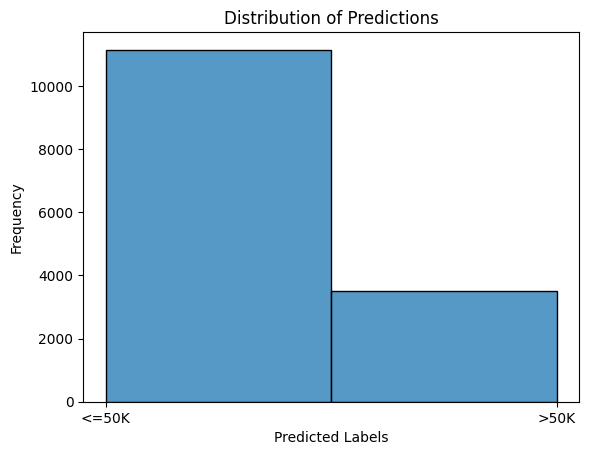

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of predictions
sns.histplot(y_pred, bins=2, kde=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()
